In [ ]:
import os, csv, random, time, keras
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.utils import np_utils
from google.colab import drive
from PIL import Image

drive.mount('/content/Mydrive')
tf.get_logger().setLevel('ERROR')

!unzip "/content/Mydrive/MyDrive/DataScienceProj-PokemonDS.zip" -d "/content"

Mounted at /content/Mydrive
Archive:  /content/Mydrive/MyDrive/DataScienceProj-PokemonDS.zip
   creating: /content/DataScienceProj-PokemonDS/
  inflating: /content/__MACOSX/._DataScienceProj-PokemonDS  
  inflating: /content/DataScienceProj-PokemonDS/.DS_Store  
  inflating: /content/__MACOSX/DataScienceProj-PokemonDS/._.DS_Store  
   creating: /content/DataScienceProj-PokemonDS/images/
  inflating: /content/__MACOSX/DataScienceProj-PokemonDS/._images  
  inflating: /content/DataScienceProj-PokemonDS/pokemon.csv  
  inflating: /content/__MACOSX/DataScienceProj-PokemonDS/._pokemon.csv  
  inflating: /content/DataScienceProj-PokemonDS/images/.DS_Store  
  inflating: /content/__MACOSX/DataScienceProj-PokemonDS/images/._.DS_Store  
   creating: /content/DataScienceProj-PokemonDS/images/images/
  inflating: /content/__MACOSX/DataScienceProj-PokemonDS/images/._images  
  inflating: /content/DataScienceProj-PokemonDS/images/images/parasect.png  
  inflating: /content/__MACOSX/DataScienceProj-

In [ ]:
# original jpgs are (120 x 120 x 3) while original pngs are (120 x 120 x 4)
# change all pngs so that they are (120 x 120 x 3) and convert to jpg
# probably better to convert png -> jpg rather than jpg -> png
# because removing the alpha channel doesn't remove info (png -> jpg)
# but adding the alpha channel adds unnecessary info (jpg -> png)

i = 0
for filename in os.listdir('/content/DataScienceProj-PokemonDS/images/images'):
    if filename.endswith(".png"):
        im = Image.open(f'/content/DataScienceProj-PokemonDS/images/images/{filename}').convert('RGBA')
        pokemon_name = filename[:-4]
        background = Image.new("RGB", im.size, (224, 224, 224))
        background.paste(im, mask=im.split()[-1])
        name=f'/content/DataScienceProj-PokemonDS/images/images/{pokemon_name}.jpg'
        img_resized = background.resize((224, 224))
        img_resized.save(name, 'JPEG')
        os.remove(f'/content/DataScienceProj-PokemonDS/images/images/{filename}') # delete original png image
        i += 1
    else:
      im = Image.open(f'/content/DataScienceProj-PokemonDS/images/images/{filename}')
      img_resized = im.resize((224, 224))
      os.remove(f'/content/DataScienceProj-PokemonDS/images/images/{filename}') # delete original png image
      name=f'/content/DataScienceProj-PokemonDS/images/images/{filename}'
      img_resized.save(name,"JPEG")

print(f'{i} images converted')

0 images converted


In [ ]:
def define_my_model():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=k, activation="softmax"))
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    # model.summary()
    return model

18
k=2 Types


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


---------------------------
Average accuracy: 0.5734472751617432
best types: ['Ice', 'Flying']
Best accuracy: 0.8484848737716675
worst types: ['Rock', 'Steel']
Worst accuracy: 0.38461539149284363


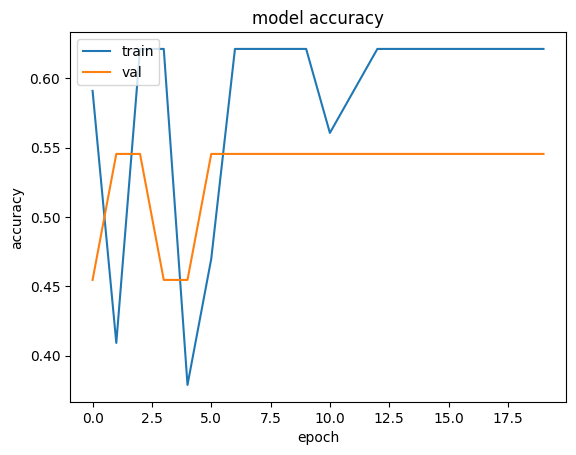

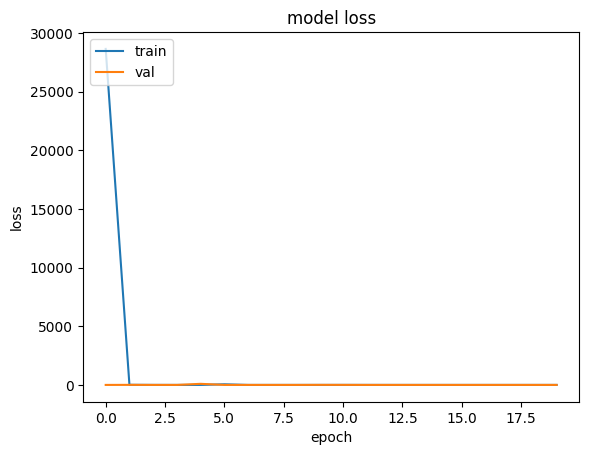

k=3 Types
---------------------------
Average accuracy: 0.4493076533079147
best types: ['Dragon', 'Fire', 'Water']
Best accuracy: 0.6101694703102112
worst types: ['Bug', 'Steel', 'Ground']
Worst accuracy: 0.28260868787765503


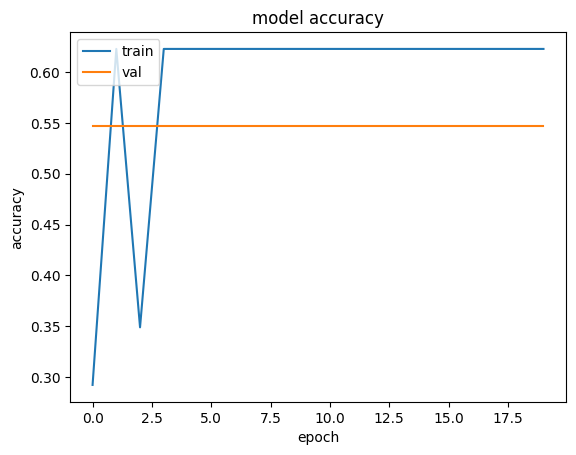

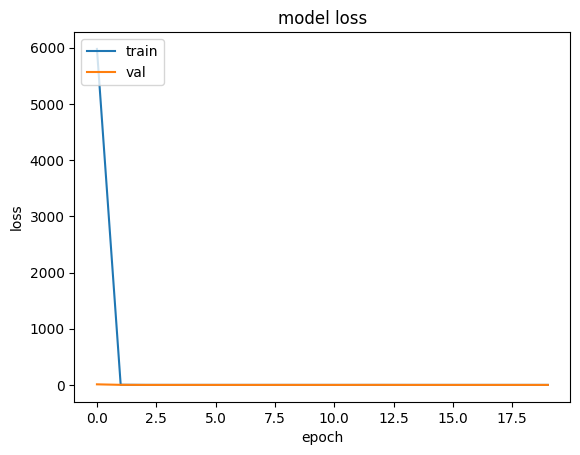

k=4 Types
---------------------------
Average accuracy: 0.32853499948978426
best types: ['Flying', 'Ground', 'Steel', 'Fighting']
Best accuracy: 0.421875
worst types: ['Dragon', 'Dark', 'Psychic', 'Grass']
Worst accuracy: 0.25


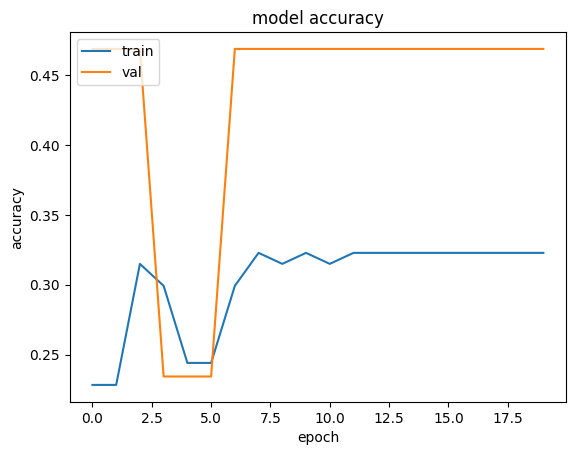

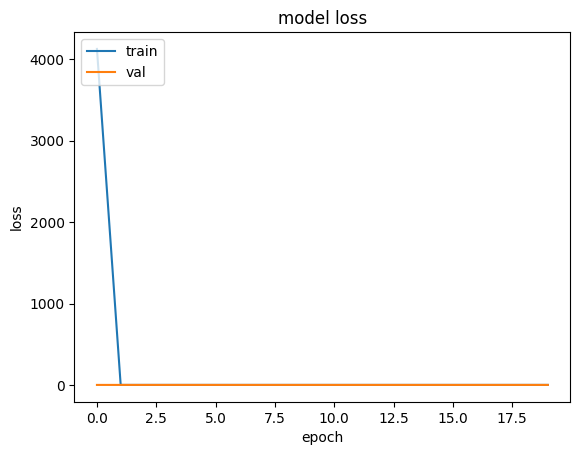

k=5 Types
---------------------------
Average accuracy: 0.30135529190301896
best types: ['Ice', 'Fairy', 'Bug', 'Grass', 'Water']
Best accuracy: 0.3820224702358246
worst types: ['Dragon', 'Normal', 'Grass', 'Ghost', 'Rock']
Worst accuracy: 0.1882352977991104


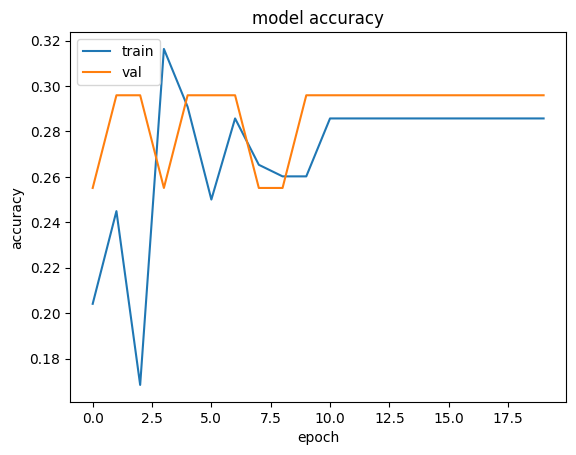

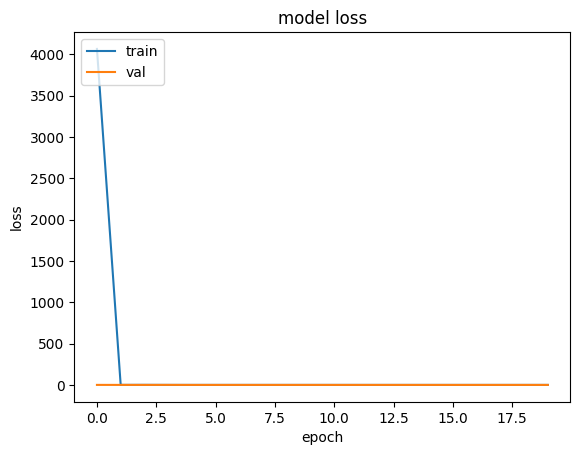

k=6 Types
---------------------------
Average accuracy: 0.25558170825243
best types: ['Rock', 'Fire', 'Dark', 'Bug', 'Water', 'Ice']
Best accuracy: 0.37634408473968506
worst types: ['Rock', 'Fairy', 'Bug', 'Dark', 'Psychic', 'Grass']
Worst accuracy: 0.12903225421905518


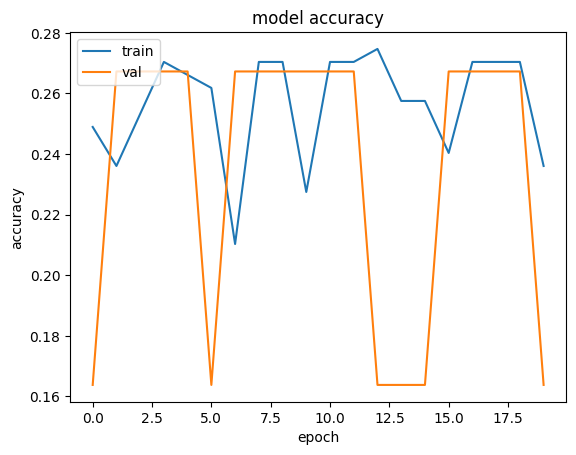

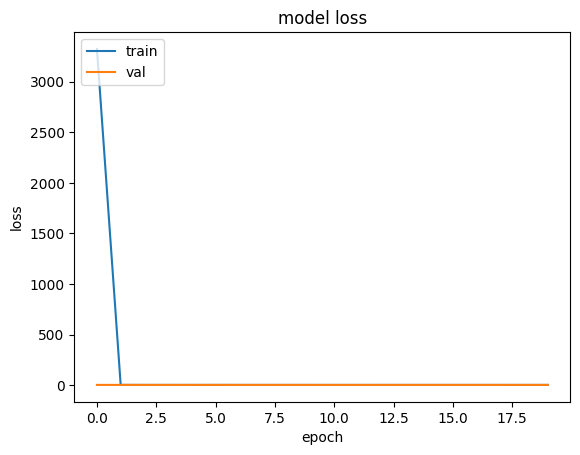

k=7 Types
---------------------------
Average accuracy: 0.2397128701210022
best types: ['Poison', 'Water', 'Electric', 'Dragon', 'Ice', 'Dark', 'Fire']
Best accuracy: 0.31313130259513855
worst types: ['Grass', 'Ice', 'Fairy', 'Steel', 'Poison', 'Ground', 'Electric']
Worst accuracy: 0.16483516991138458


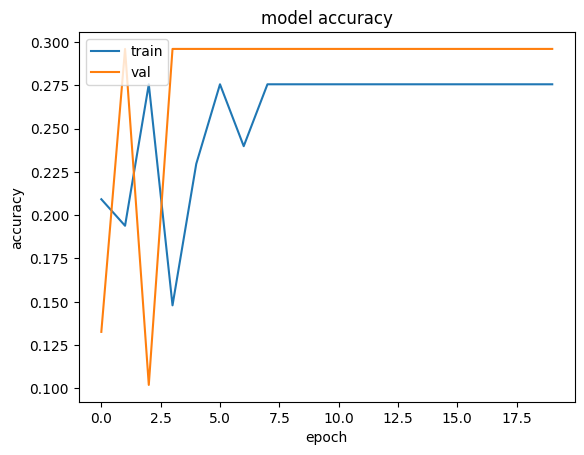

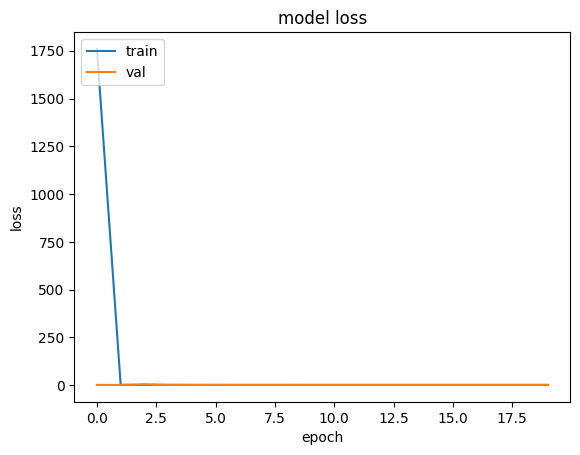

k=8 Types
---------------------------
Average accuracy: 0.21273919343948364
best types: ['Bug', 'Fighting', 'Flying', 'Dark', 'Rock', 'Fairy', 'Poison', 'Steel']
Best accuracy: 0.25
worst types: ['Fire', 'Grass', 'Ground', 'Fairy', 'Bug', 'Dark', 'Fighting', 'Normal']
Worst accuracy: 0.1746031790971756


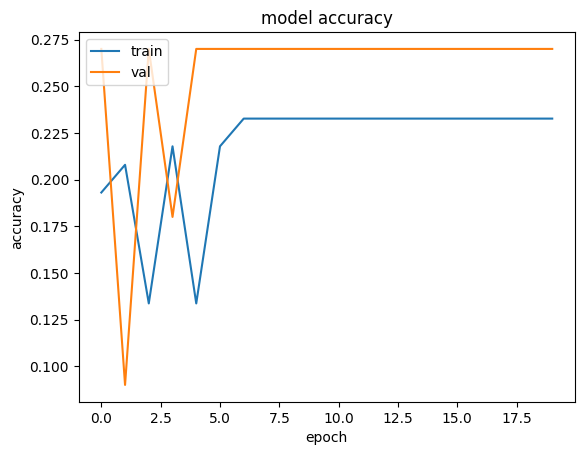

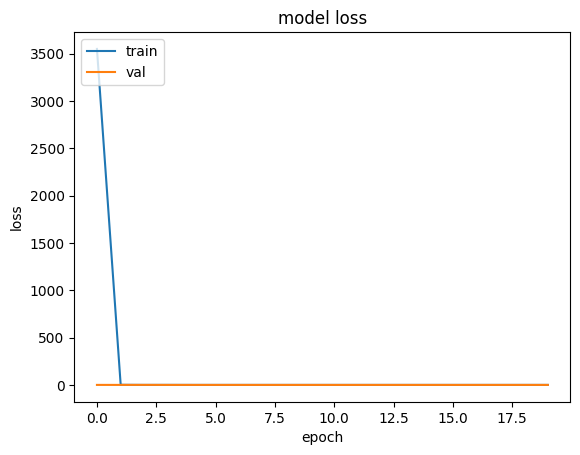

k=9 Types
---------------------------
Average accuracy: 0.19682831466197967
best types: ['Dark', 'Bug', 'Fairy', 'Steel', 'Electric', 'Normal', 'Poison', 'Psychic', 'Grass']
Best accuracy: 0.22900763154029846
worst types: ['Grass', 'Flying', 'Psychic', 'Steel', 'Water', 'Fighting', 'Rock', 'Electric', 'Ground']
Worst accuracy: 0.14084507524967194


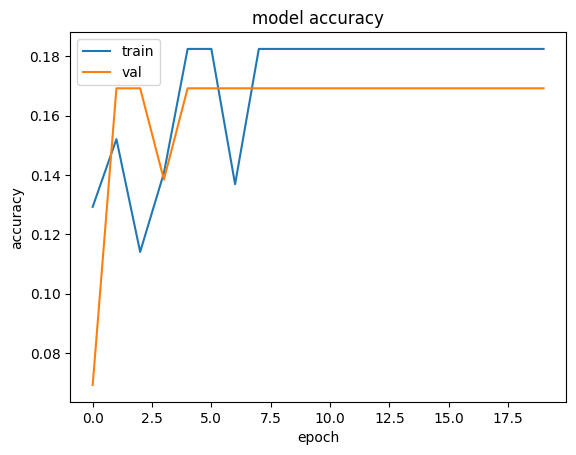

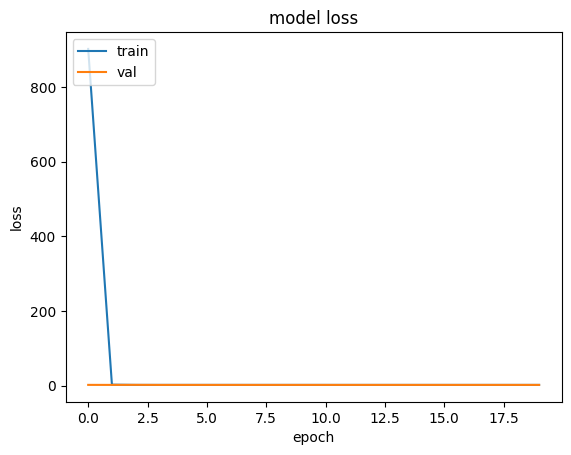

k=10 Types
---------------------------
Average accuracy: 0.1906413048505783
best types: ['Ground', 'Rock', 'Bug', 'Ghost', 'Grass', 'Electric', 'Fighting', 'Psychic', 'Normal', 'Dragon']
Best accuracy: 0.23489932715892792
worst types: ['Ground', 'Dark', 'Dragon', 'Grass', 'Ice', 'Normal', 'Poison', 'Fairy', 'Flying', 'Psychic']
Worst accuracy: 0.13768115639686584


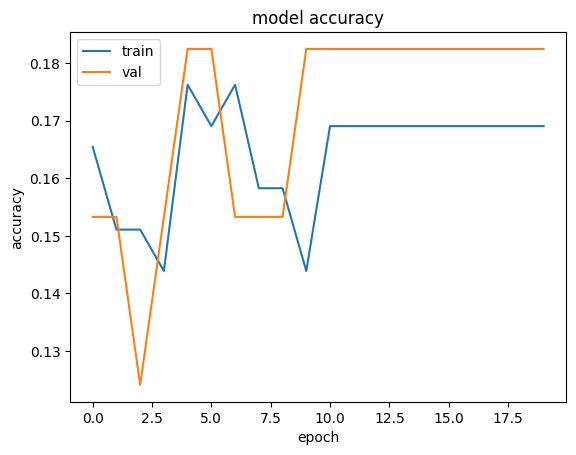

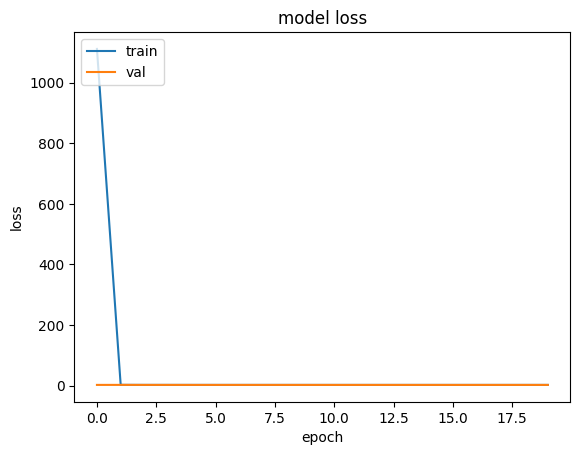

k=11 Types
---------------------------
Average accuracy: 0.15688515827059746
best types: ['Normal', 'Psychic', 'Grass', 'Electric', 'Rock', 'Poison', 'Ice', 'Bug', 'Ghost', 'Dragon', 'Dark']
Best accuracy: 0.21854305267333984
worst types: ['Ghost', 'Steel', 'Fire', 'Bug', 'Water', 'Electric', 'Fairy', 'Grass', 'Flying', 'Psychic', 'Ground']
Worst accuracy: 0.12025316804647446


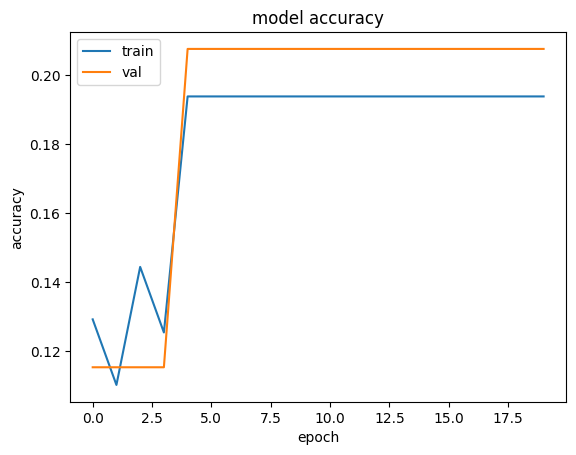

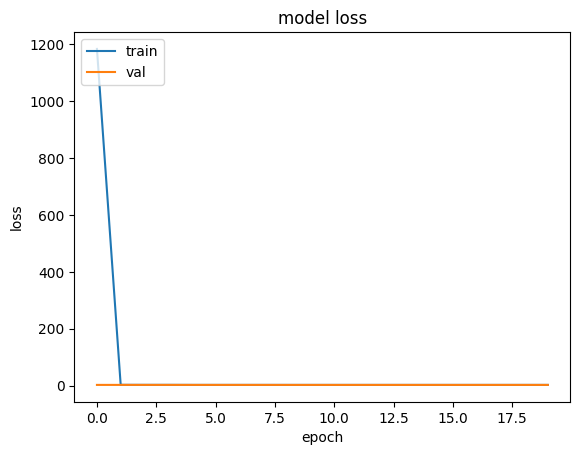

k=12 Types
---------------------------
Average accuracy: 0.14357105940580367
best types: ['Bug', 'Ground', 'Dark', 'Water', 'Steel', 'Ice', 'Ghost', 'Fairy', 'Psychic', 'Fire', 'Dragon', 'Grass']
Best accuracy: 0.1794871836900711
worst types: ['Poison', 'Fighting', 'Electric', 'Fire', 'Flying', 'Dark', 'Rock', 'Normal', 'Bug', 'Fairy', 'Steel', 'Psychic']
Worst accuracy: 0.11038961261510849


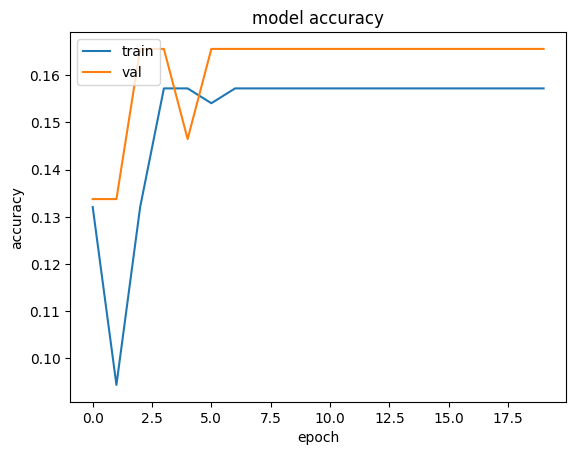

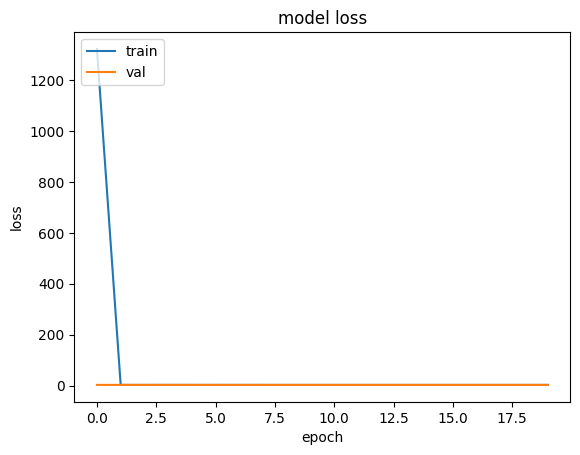

k=13 Types
---------------------------
Average accuracy: 0.1421871453523636
best types: ['Fire', 'Water', 'Normal', 'Ice', 'Dragon', 'Poison', 'Dark', 'Ground', 'Fighting', 'Fairy', 'Electric', 'Steel', 'Rock']
Best accuracy: 0.16867469251155853
worst types: ['Dragon', 'Flying', 'Steel', 'Ice', 'Grass', 'Electric', 'Rock', 'Psychic', 'Fire', 'Ground', 'Dark', 'Water', 'Fighting']
Worst accuracy: 0.11445783078670502


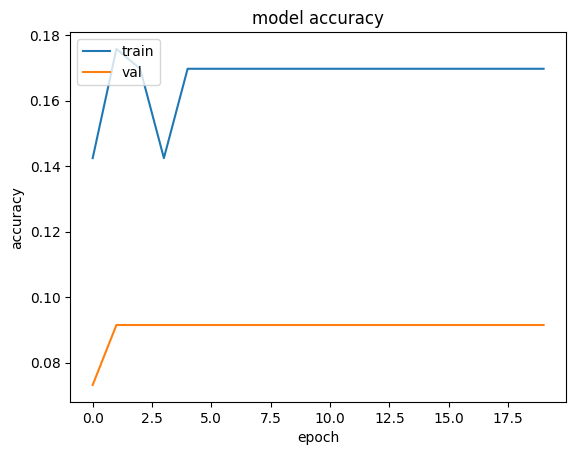

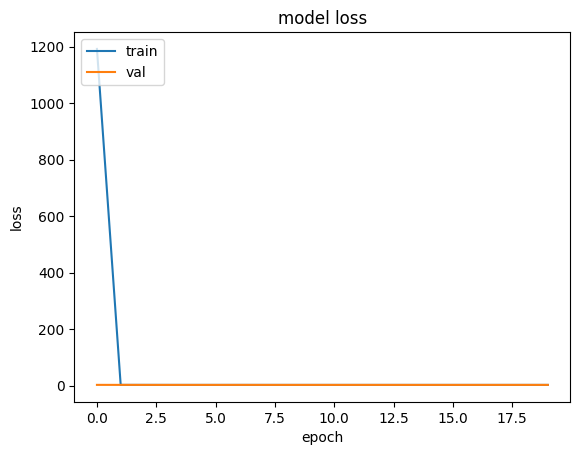

k=14 Types
---------------------------
Average accuracy: 0.12531422898173333
best types: ['Normal', 'Dragon', 'Flying', 'Fighting', 'Ground', 'Fire', 'Steel', 'Electric', 'Fairy', 'Psychic', 'Ice', 'Poison', 'Grass', 'Rock']
Best accuracy: 0.1599999964237213
worst types: ['Rock', 'Bug', 'Ghost', 'Fairy', 'Normal', 'Electric', 'Flying', 'Fire', 'Water', 'Dark', 'Grass', 'Fighting', 'Steel', 'Poison']
Worst accuracy: 0.0833333358168602


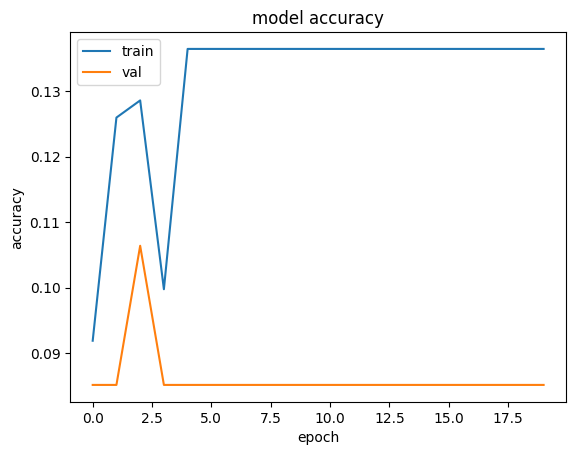

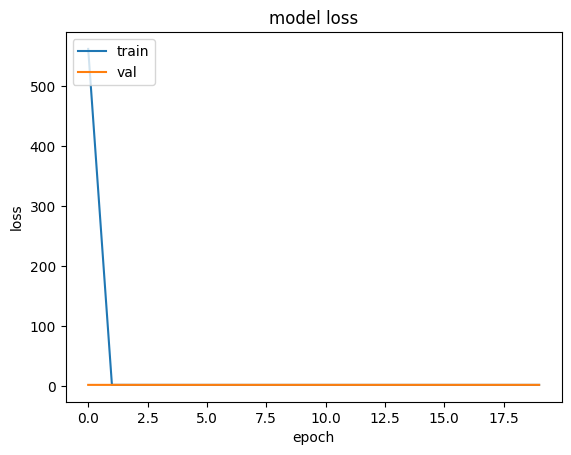

k=15 Types
---------------------------
Average accuracy: 0.12241124734282494
best types: ['Ice', 'Ground', 'Poison', 'Water', 'Ghost', 'Dragon', 'Dark', 'Bug', 'Rock', 'Fire', 'Fairy', 'Electric', 'Psychic', 'Steel', 'Grass']
Best accuracy: 0.13294798135757446
worst types: ['Dragon', 'Fairy', 'Fighting', 'Rock', 'Ice', 'Flying', 'Steel', 'Ground', 'Electric', 'Dark', 'Grass', 'Fire', 'Normal', 'Water', 'Poison']
Worst accuracy: 0.10215053707361221


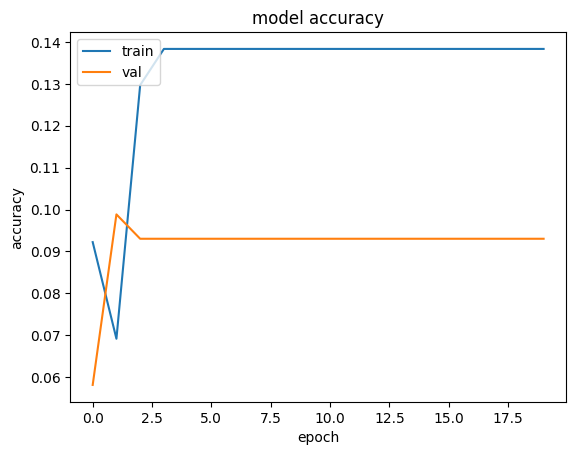

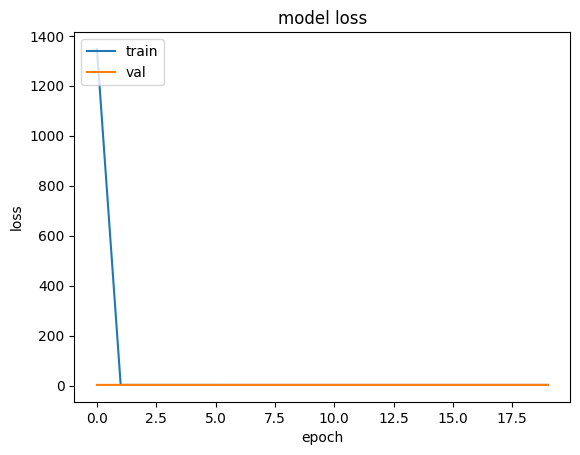

k=16 Types
---------------------------
Average accuracy: 0.12543809413909912
best types: ['Grass', 'Ice', 'Ground', 'Bug', 'Normal', 'Fairy', 'Steel', 'Fire', 'Flying', 'Poison', 'Rock', 'Dragon', 'Psychic', 'Electric', 'Ghost', 'Dark']
Best accuracy: 0.14364640414714813
worst types: ['Dragon', 'Normal', 'Fighting', 'Ice', 'Steel', 'Fire', 'Grass', 'Bug', 'Poison', 'Electric', 'Water', 'Fairy', 'Psychic', 'Ghost', 'Rock', 'Flying']
Worst accuracy: 0.1071428582072258


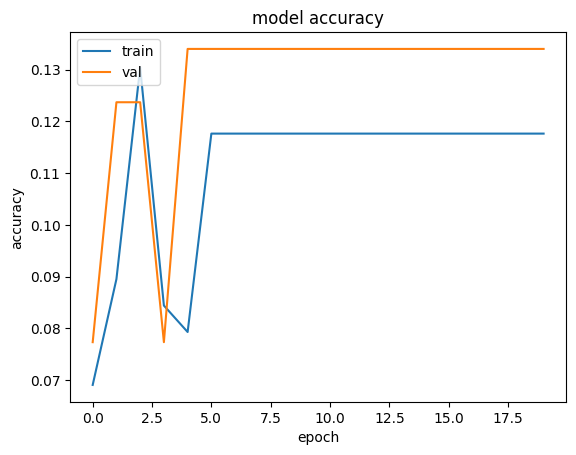

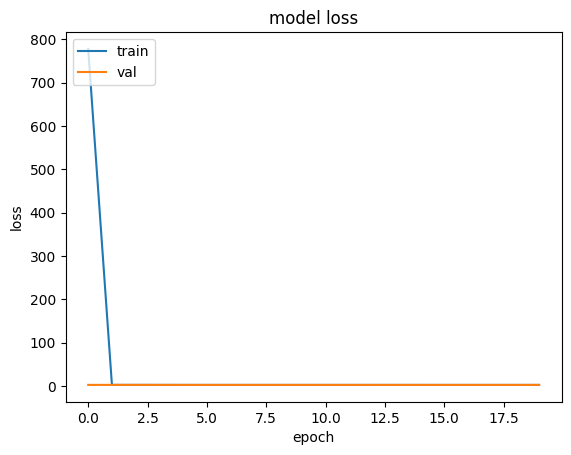

k=17 Types
---------------------------
Average accuracy: 0.11330590769648552
best types: ['Psychic', 'Ground', 'Bug', 'Ghost', 'Normal', 'Flying', 'Fairy', 'Dragon', 'Water', 'Fighting', 'Rock', 'Fire', 'Poison', 'Steel', 'Grass', 'Ice', 'Dark']
Best accuracy: 0.14795918762683868
worst types: ['Dark', 'Psychic', 'Ice', 'Normal', 'Steel', 'Water', 'Grass', 'Rock', 'Bug', 'Ground', 'Fairy', 'Dragon', 'Fighting', 'Poison', 'Electric', 'Fire', 'Flying']
Worst accuracy: 0.07999999821186066


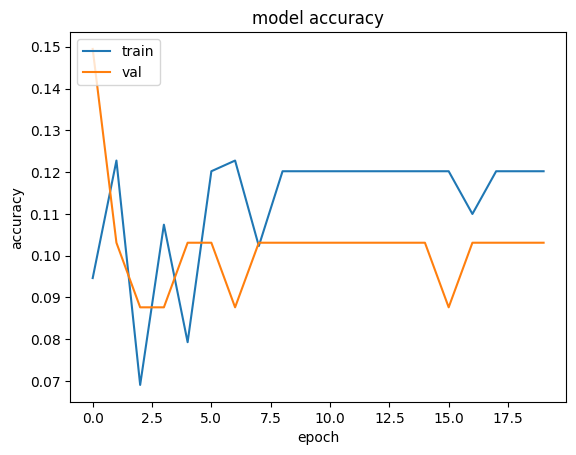

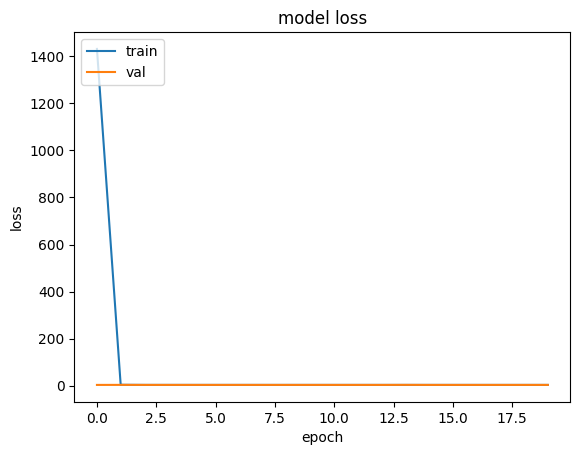

k=18 Types
---------------------------
Average accuracy: 0.12068965584039688
best types: ['Fairy', 'Fire', 'Dark', 'Electric', 'Fighting', 'Grass', 'Rock', 'Psychic', 'Dragon', 'Poison', 'Bug', 'Ghost', 'Ice', 'Steel', 'Water', 'Normal', 'Ground', 'Flying']
Best accuracy: 0.1625615805387497
worst types: ['Water', 'Dark', 'Ground', 'Fairy', 'Poison', 'Normal', 'Fire', 'Fighting', 'Psychic', 'Dragon', 'Rock', 'Bug', 'Steel', 'Ghost', 'Ice', 'Flying', 'Electric', 'Grass']
Worst accuracy: 0.08374384045600891


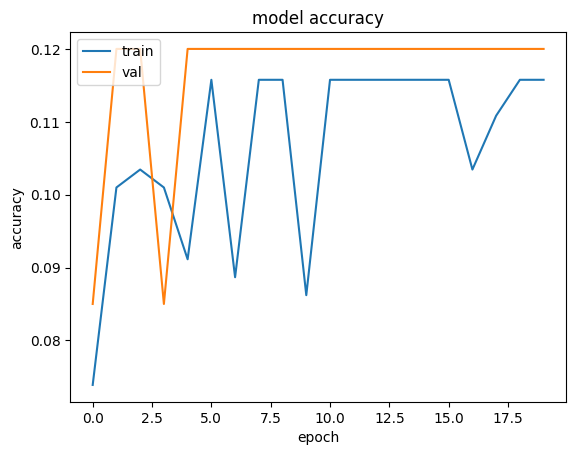

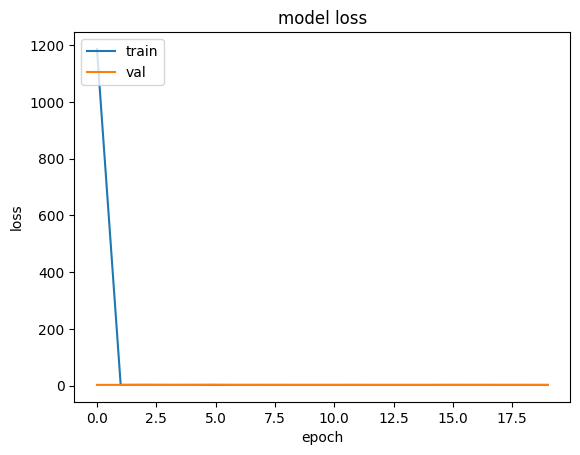

In [ ]:
t0 = time.perf_counter()

all_types = ['Grass', 'Poison', 'Fire', 'Flying', 'Water', 'Bug', 'Normal', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Steel', 'Ice', 'Ghost', 'Dragon', 'Dark']
print(f'{len(all_types)}')

results_per_type = {} # k => {'accuracy' => average accuracy, 'best_types' => [], 'worst_types' => [], ...}

# k will be the number of types to use for classification (min 2, max 18)
for k in range(2, 19):
    print(f'{k=} Types')
    # keep track of best, worst types to classify
    accuracy_list = []
    best_types = []
    worst_types = []
    highest_accuracy = 0
    lowest_accuracy = 1

    # keep track of predictions for worst types to classify
    worst_y_predict = []
    worst_y_test = []
    worst_z = []
    worst_type_mapping_reversed = {}
    worst_pokemon_type_mapping = {}
    
    results_per_type[k] = {}

    # choose k random types and perform training 10 times
    # this is to see which combinations of types are better/worse for classification
    # e.g. one iteration can be for fire vs water, which is expected to have a high accuracy
    # and another iteration can be for ground vs rock, which is probably harder to distinguish
    for _ in range(10):

        # choose k out of the 18 total types to perform training
        num_types = k
        types = random.sample(all_types, k=num_types)

        # convert pokemon types to integers and map pokemon to their types
        type_mapping = {} # pokemon type (string) => pokemon type (integer)
        type_mapping_reversed = {} # pokemon type (integer) => pokemon type (string)
        pokemon_type_mapping = {} # pokemon name => pokemon type1 (integer)
        i = 0
        with open('/content/DataScienceProj-PokemonDS/pokemon.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None) # skip header
            for row in reader:
                if row[1] in types or (len(row) > 2 and row[2] in types):
                    if row[1] in types:
                        if row[1] not in type_mapping:
                            type_mapping[row[1]] = i
                            type_mapping_reversed[i] = row[1]
                            i += 1
                        pokemon_type_mapping[row[0]] = type_mapping[row[1]]
                    if len(row) > 2 and row[2] in types:
                        if row[2] not in type_mapping:
                            type_mapping[row[2]] = i
                            type_mapping_reversed[i] = row[2]
                            i += 1
                        pokemon_type_mapping[row[0]] = type_mapping[row[2]]

        # prepare X and y data
        X = []
        y = []
        z = [] # keep track of pokemon names
        for pokemon_name in pokemon_type_mapping.keys():
            i = mpimg.imread(f'/content/DataScienceProj-PokemonDS/images/images/{pokemon_name}.jpg')
            X.append(i)
            y.append(pokemon_type_mapping[pokemon_name])
            z.append(pokemon_name)

        # split into training and testing
        X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.25)

        y_train = np_utils.to_categorical(y_train, len(types))
        y_test = np_utils.to_categorical(y_test, len(types))

        # # # image augmentation
        # X_train_augmented = []
        # y_train_augmented = []

        # for img, y in zip(X_train, y_train):
        #     X_train_augmented.append(img)
        #     y_train_augmented.append(y)
        #     X_train_augmented.append(tf.image.flip_left_right(img))
        #     y_train_augmented.append(y)
        #     X_train_augmented.append(tf.image.rot90(img))
        #     y_train_augmented.append(y)

        X_train = np.array(X_train)
        y_train = np.array(y_train)
        X_test = np.array(X_test)
        y_test = np.array(y_test)

        # define model
        model = define_my_model()

        # train model
        fitted_model = model.fit(X_train, y_train, validation_split=0.33, epochs=20, verbose=0)
        
        # evaluate model
        score = model.evaluate(X_test, y_test, verbose=0)
        accuracy = score[1]
        accuracy_list.append(accuracy)

        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            best_types = types

        if accuracy < lowest_accuracy:
            lowest_accuracy = accuracy
            worst_types = types
            worst_y_predict = model.predict(X_test, verbose=0)
            worst_y_test = y_test
            worst_z = z_test
            worst_type_mapping_reversed = type_mapping_reversed
            worst_pokemon_type_mapping = pokemon_type_mapping
    
    results_per_type[k]['accuracy'] = np.mean(accuracy_list)
    results_per_type[k]['best_types'] = best_types
    results_per_type[k]['best_accuracy'] = highest_accuracy
    results_per_type[k]['worst_types'] = worst_types
    results_per_type[k]['worst_accuracy'] = lowest_accuracy
    results_per_type[k]['worst_y_predict'] = worst_y_predict
    results_per_type[k]['worst_y_test'] = worst_y_test
    results_per_type[k]['worst_z'] = worst_z
    results_per_type[k]['worst_type_mapping_reversed'] = worst_type_mapping_reversed
    results_per_type[k]['worst_pokemon_type_mapping'] = worst_pokemon_type_mapping
    
    print("---------------------------")
    print(f"Average accuracy: {results_per_type[k]['accuracy']}")
    print("best types:", best_types)
    print(f"Best accuracy: {highest_accuracy}")
    print("worst types:", worst_types)
    print(f"Worst accuracy: {lowest_accuracy}")
    # summarize history for accuracy
    plt.plot(fitted_model.history['accuracy'])
    plt.plot(fitted_model.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(fitted_model.history['loss'])
    plt.plot(fitted_model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
t1 = time.perf_counter()
print(f"In minutes: {(t1-t0)//60}")

In minutes: 38.0


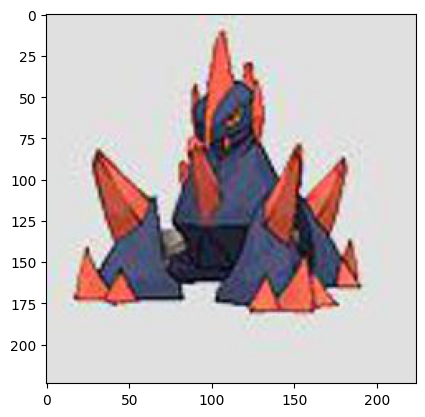

gigalith is Rock. model predicted Rock


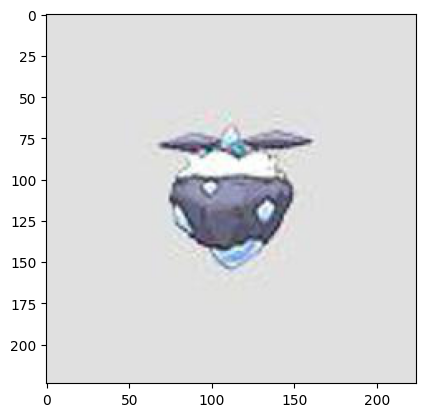

carbink is Rock. model predicted Rock


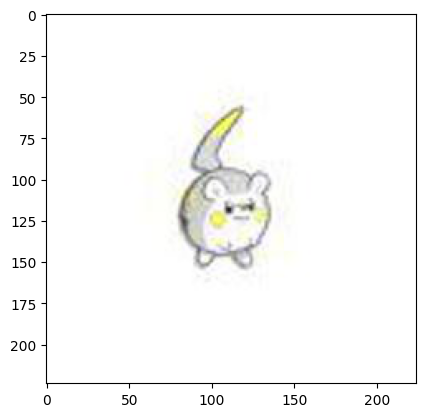

togedemaru is Steel. model predicted Rock


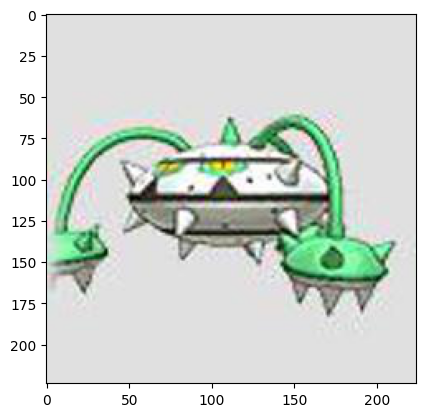

ferrothorn is Steel. model predicted Rock


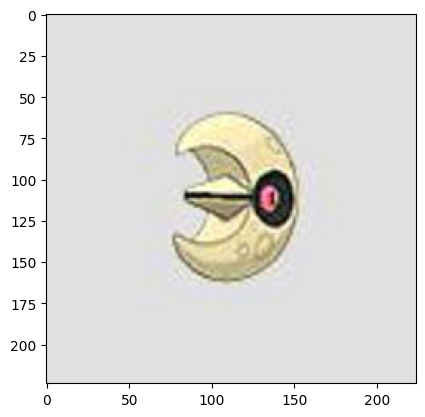

lunatone is Rock. model predicted Rock


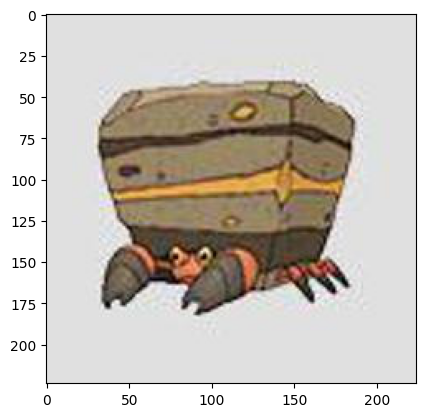

crustle is Rock. model predicted Rock


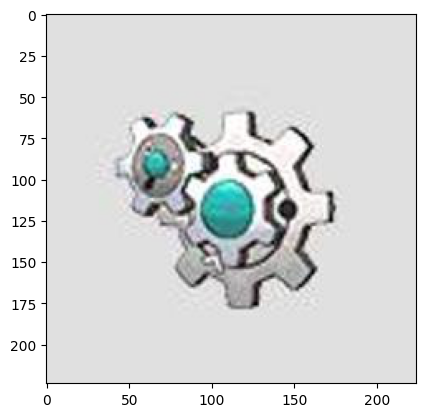

klang is Steel. model predicted Rock


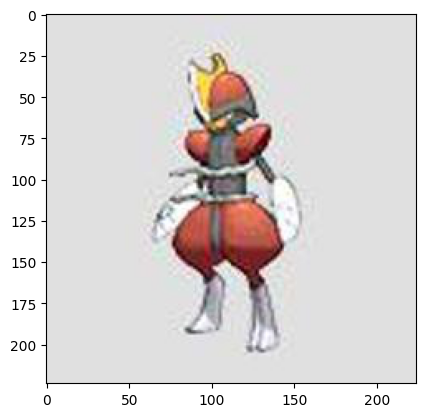

bisharp is Steel. model predicted Rock


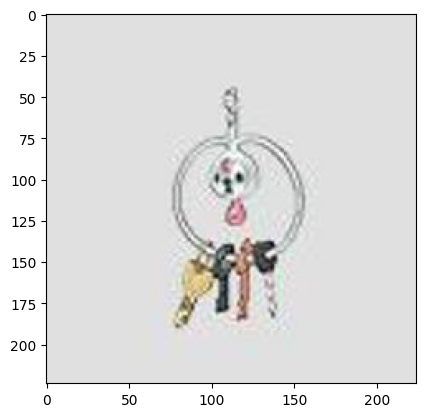

klefki is Steel. model predicted Rock


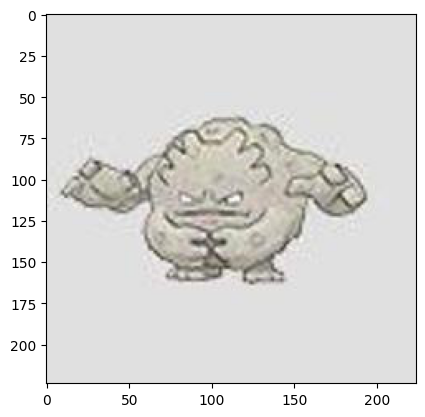

graveler is Rock. model predicted Rock


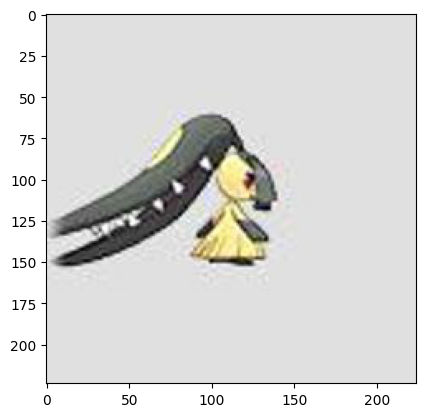

mawile is Steel. model predicted Rock


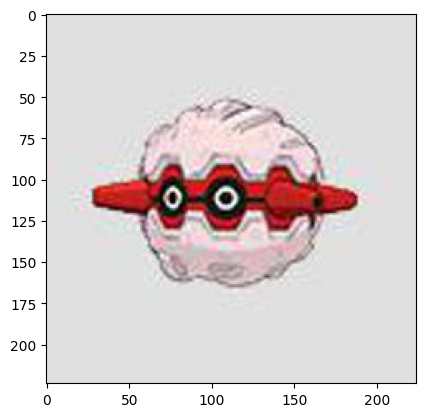

forretress is Steel. model predicted Rock


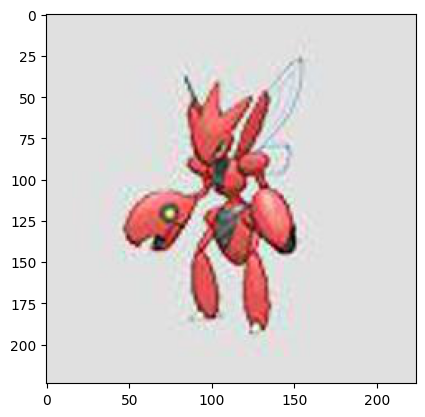

scizor is Steel. model predicted Rock


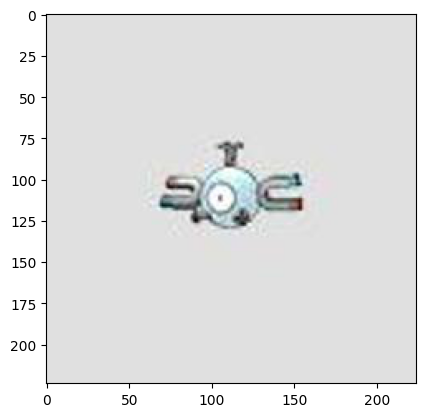

magnemite is Steel. model predicted Rock


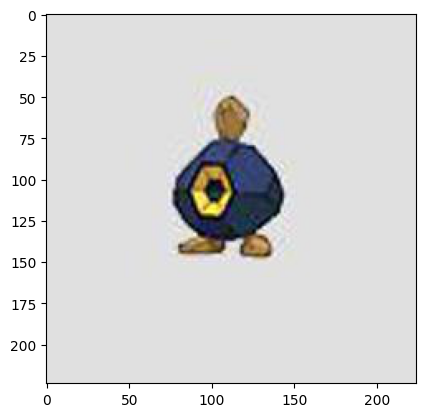

roggenrola is Rock. model predicted Rock


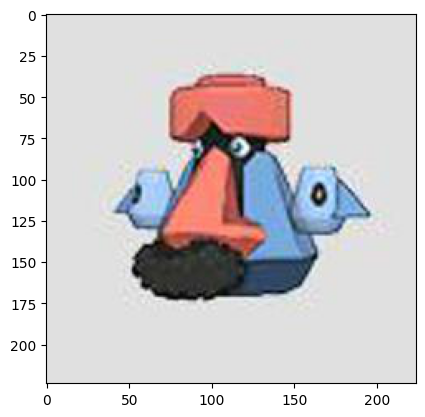

probopass is Steel. model predicted Rock


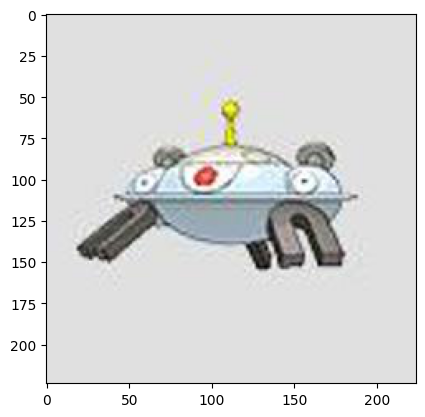

magnezone is Steel. model predicted Rock


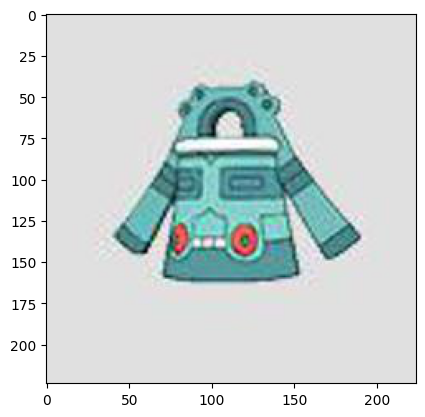

bronzong is Steel. model predicted Rock


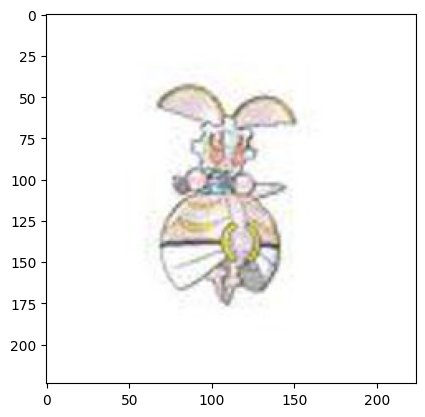

magearna is Steel. model predicted Rock


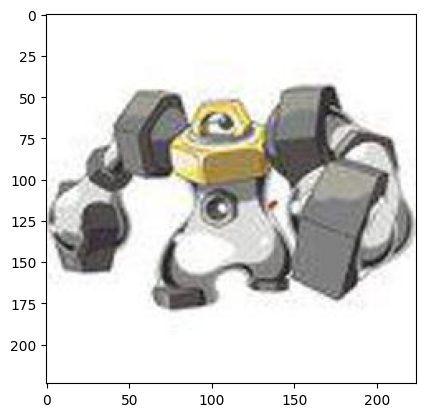

melmetal is Steel. model predicted Rock


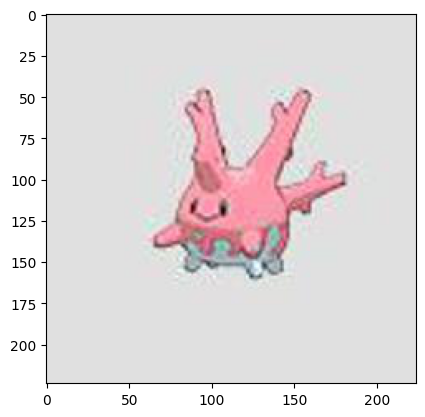

corsola is Rock. model predicted Rock


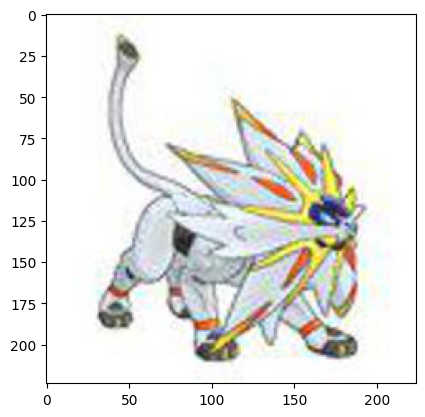

solgaleo is Steel. model predicted Rock


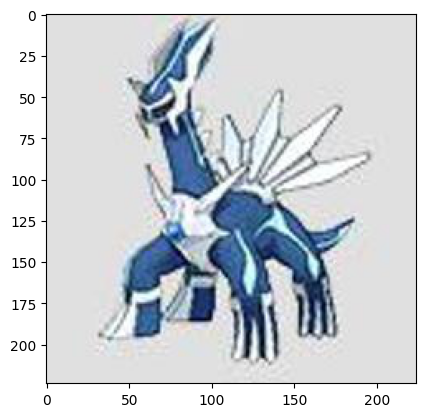

dialga is Steel. model predicted Rock


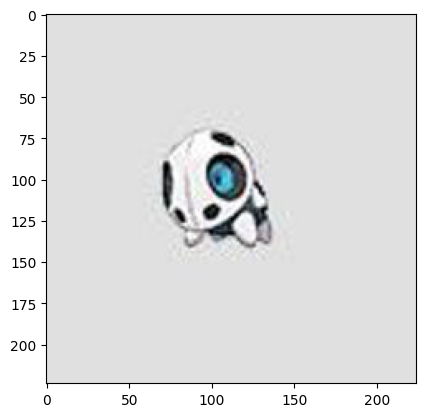

aron is Rock. model predicted Rock


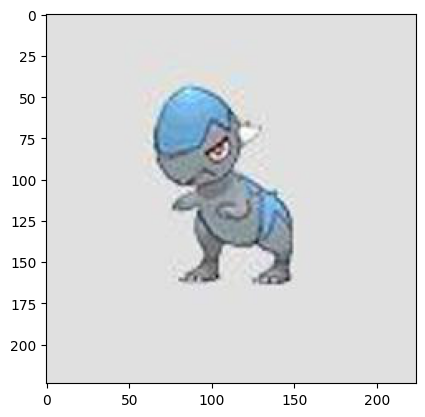

cranidos is Rock. model predicted Rock


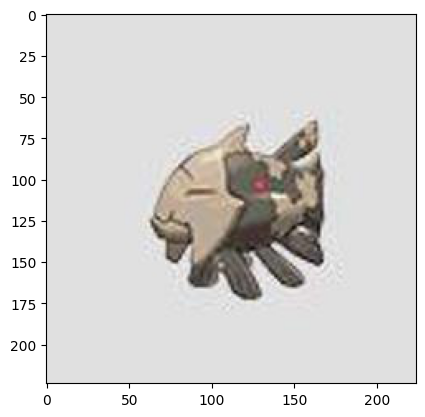

relicanth is Rock. model predicted Rock


In [ ]:
def see_the_results(y_predict, z_test, type_mapping_reversed, pokemon_type_mapping):
    for y, z in zip(y_predict, z_test):
        actual_type = type_mapping_reversed[pokemon_type_mapping[z]]
        predicted_type = type_mapping_reversed[np.argmax(y)]

        %matplotlib inline
        i = mpimg.imread(f'/content/DataScienceProj-PokemonDS/images/images/{z}.jpg')
        plt.imshow(i)
        plt.show()

        print(f'{z} is {actual_type}. model predicted {predicted_type}')

see_the_results(results_per_type[2]['worst_y_predict'], results_per_type[2]['worst_z'], results_per_type[2]['worst_type_mapping_reversed'], results_per_type[2]['worst_pokemon_type_mapping'])

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]) [0.5734472751617432, 0.4493076533079147, 0.32853499948978426, 0.30135529190301896, 0.25558170825243, 0.2397128701210022, 0.21273919343948364, 0.19682831466197967, 0.1906413048505783, 0.15688515827059746, 0.14357105940580367, 0.1421871453523636, 0.12531422898173333, 0.12241124734282494, 0.12543809413909912, 0.11330590769648552, 0.12068965584039688]


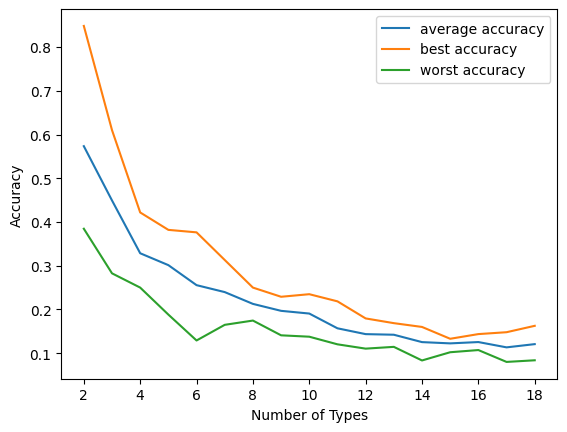

In [ ]:
plt.plot(results_per_type.keys(), [results_per_type[k]['accuracy'] for k in results_per_type.keys()])
plt.plot(results_per_type.keys(), [results_per_type[k]['best_accuracy'] for k in results_per_type.keys()])
plt.plot(results_per_type.keys(), [results_per_type[k]['worst_accuracy'] for k in results_per_type.keys()])
plt.xlabel('Number of Types')
plt.ylabel('Accuracy')
plt.legend(['average accuracy', 'best accuracy', 'worst accuracy'])
plt.show()